# Imports and parameters

In [1]:
import os
from multiprocessing import Pool, cpu_count
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.cosmology import Planck15 as cosmo
import astropy.units as u
import astropy.constants as const
from astropy.wcs import WCS
import numpy as np
import scipy.ndimage as ndimage
import copy
import emcee
import corner
import matplotlib
import matplotlib.pyplot as plt
import healpy as hp
from matplotlib.colors import SymLogNorm

from PerseusGammaCalibration import persus_model_library
import minot

# Modify plotting parameters
dict_base = {'font.size':        16,
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15,
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

# Define the models

In [2]:
# Reference model
C0 = persus_model_library.default_model()

# Taylor direct measurement + 2/3 scaling
C1 = persus_model_library.set_magnetic_field_model(C0, case='Taylor2006')

# Walker KHI
C2 = persus_model_library.set_magnetic_field_model(C0, case='Walker2017')

# Bonafede 2010 + Coma scaling best
C3 = persus_model_library.set_magnetic_field_model(C0, case='Bonafede2010best')

# Bonafede 2010 + Coma scaling LL
C4 = persus_model_library.set_magnetic_field_model(C0, case='Bonafede2010low')

# Bonafede 2010 + Coma scaling UL
C5 = persus_model_library.set_magnetic_field_model(C0, case='Bonafede2010up')

# Bonafede 2010 + Coma scaling 2/3
C6 = persus_model_library.set_magnetic_field_model(C0, case='Bonafede2010std')

/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/minot/model_modpar.py:1118: RuntimeWarning: divide by zero encountered in log10
  np.log10(user_p), kind='linear', fill_value='extrapolate')
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: invalid value encountered in subtract
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


# Comparison

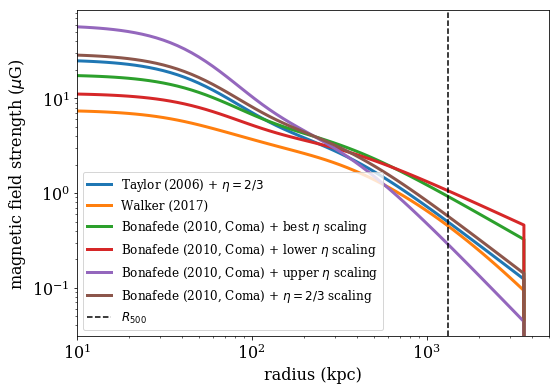

In [3]:
fig = plt.figure(0, figsize=(8, 6))
r, B = C1.get_magfield_profile()
plt.loglog(r,B, label=C1.name, linewidth=3)
r, B = C2.get_magfield_profile()
plt.loglog(r,B, label=C2.name, linewidth=3)
r, B = C3.get_magfield_profile()
plt.loglog(r,B, label=C3.name, linewidth=3)
r, B = C4.get_magfield_profile()
plt.loglog(r,B, label=C4.name, linewidth=3)
r, B = C5.get_magfield_profile()
plt.loglog(r,B, label=C5.name, linewidth=3)
r, B = C6.get_magfield_profile()
plt.loglog(r,B, label=C6.name, linewidth=3)
plt.axvline(C1.R500.to_value('kpc'), color='k', linestyle='--', label=r'$R_{500}$')
plt.xlabel('radius (kpc)')
plt.ylabel('magnetic field strength ($\\mu$G)')
plt.xlim(10,5000)
plt.legend(loc='lower left', fontsize=12)
plt.savefig(C0.output_dir+'/Magnetic_Field_Models.pdf')